In [1]:
from pycalphad import Database, Model, variables as v
from pycalphad import equilibrium, calculate
import numpy as np
from pycalphad.tests.datasets import *
dbf = Database('alzn_mey.tdb')

In [7]:
v.T.default_value = 300
eq2 = equilibrium(dbf, ['AL', 'ZN', 'VA'], ['FCC_A1', 'HCP_A3', 'LIQUID'],
                 {v.X('ZN'): 0.25, v.NP('LIQUID'): 0.9999,
                  v.P: 1e5}, verbose=True)
print(eq2)

Components: AL VA ZN
Phases: FCC_A1 
HCP_A3 
LIQUID 
[done]
dual_inf 23750.01639900417
Trying to improve poor solution
Calculation Failed:  OrderedDict([('N', array(1.)), ('NP_LIQUID', array(0.9999)), ('P', array(100000.)), ('X_ZN', array(0.25))]) b'Maximum number of iterations exceeded (can be specified by an option).'
Chemical Potentials [-22003.96389693 -35522.86524671]
[9.99999990e-12 1.00000000e-16 1.47600660e-14 9.99999980e-12
 1.40561120e+04 1.18173861e-11 6.50240713e-11 1.33337750e-11
 3.99960228e-11 1.02019996e-07 3.57654309e+03 1.00010100e-11]
[1.00000000e+00 1.00000000e+05 6.77503746e+02 1.00000001e+00
 1.00000000e-15 8.46210810e-01 1.53789190e-01 7.49975150e-01
 2.50024850e-01 9.90100000e-05 1.00000000e-06 9.99900000e-01]
Status: -1 b'Maximum number of iterations exceeded (can be specified by an option).'
('Exceeded zero seen:', CompositionSet(HCP_A3, [1.e-15 1.e+00], NP=1e-06, GM=-12489.369042318192))
Removing CompositionSet(HCP_A3, [1.e-15 1.e+00], NP=nan, GM=-12489.36904

In [6]:
eq2.GM - ((eq2.NP.isel(vertex=0) * eq2.MU * eq2.X.isel(vertex=0)).sum() + (eq2.NP.isel(vertex=1) * (eq2.MU * eq2.X.isel(vertex=1)).sum()))

<xarray.DataArray (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 1)>
array([[[[-9.817231e-07]]]])
Coordinates:
  * N          (N) float64 1.0
  * NP_LIQUID  (NP_LIQUID) float64 0.9999
  * P          (P) float64 1e+05
  * X_ZN       (X_ZN) float64 0.25

In [4]:
fcc = calculate(dbf, ['AL', 'ZN', 'VA'], 'FCC_A1',
                 T=(300,2000,20), P=1e5, output='HM', points=[[0.828636,  0.171364]])
liq = calculate(dbf, ['AL', 'ZN', 'VA'], 'LIQUID',
                 T=(300,2000,20), P=1e5, output='HM', points=[[0.549538,  0.450462]])

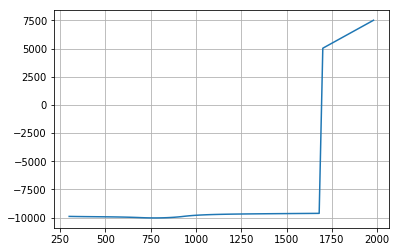

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.plot(fcc['T'], fcc.HM.values.flatten() - liq.HM.values.flatten())
plt.grid(True)

In [6]:
eq2.X

<xarray.DataArray 'X' (N: 1, P: 1, NP_LIQUID: 1, X_ZN: 1, vertex: 3, component: 2)>
array([[[[[[0.707461, 0.292539],
           [0.858469, 0.141531],
           [     nan,      nan]]]]]])
Coordinates:
  * N          (N) float64 1.0
  * NP_LIQUID  (NP_LIQUID) float64 0.2817
  * P          (P) float64 1e+05
  * X_ZN       (X_ZN) float64 0.25
  * vertex     (vertex) int32 0 1 2
  * component  (component) <U2 'AL' 'ZN'